In [29]:
import warnings
warnings.filterwarnings('ignore')

from src.prepare import telco_eda_prep
from src.helper_functions import plot_corr

from scipy.stats import chi2_contingency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

charizard = ['#FCC499', '#F2684A', '#FAAA6D', '#419EAE', '#FFEEB0']
sns.set_palette(sns.color_palette(charizard))

In [17]:
df = telco_eda_prep()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                7043 non-null   object  
 1   senior_citizen        7043 non-null   int64   
 2   partner               7043 non-null   object  
 3   dependents            7043 non-null   object  
 4   tenure                7043 non-null   int64   
 5   phone_service         7043 non-null   object  
 6   multiple_lines        7043 non-null   object  
 7   internet_service      7043 non-null   object  
 8   online_security       7043 non-null   object  
 9   online_backup         7043 non-null   object  
 10  device_protection     7043 non-null   object  
 11  tech_support          7043 non-null   object  
 12  streaming_tv          7043 non-null   object  
 13  streaming_movies      7043 non-null   object  
 14  contract              7043 non-null   object  
 15  pape

In [31]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_bins
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,1-year,Yes,check,65.6,593.30,No,"(58.83, 70.35]"
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,month-to-month,No,check,59.9,542.40,No,"(58.83, 70.35]"
2,Male,0,No,No,4,Yes,No,fiber optic,No,No,...,No,No,No,month-to-month,Yes,e-check,73.9,280.85,Yes,"(70.35, 79.1]"
3,Male,1,Yes,No,13,Yes,No,fiber optic,No,Yes,...,No,Yes,Yes,month-to-month,Yes,e-check,98.0,1237.85,Yes,"(94.25, 102.6]"
4,Female,1,Yes,No,3,Yes,No,fiber optic,No,No,...,Yes,Yes,No,month-to-month,Yes,check,83.9,267.40,Yes,"(79.1, 85.5]"


### Why did 27% of Telco customers churn?

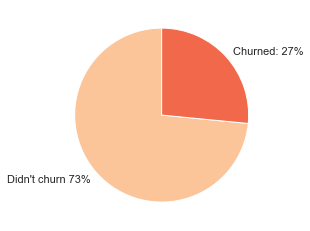

In [24]:
plt.pie(df.churn.value_counts(), labels=["Didn't churn 73%","Churned: 27%"], startangle=90);

### $χ^2$ contingency table hypothesis testing

$H_0$ : churn is independent of everything

In [28]:
insignificant_variables = []
for col in df.columns[:-4]:
    observed = pd.crosstab(df.churn, df[col])
    chi2, p, degf, expected = chi2_contingency(observed)
    #Bonferroni correction = to no. of comparisons
    bonf, alpha = observed.shape[0]*observed.shape[1], .05
    if bonf*p > alpha: insignificant_variables.append(col)

insignificant_variables

['gender', 'phone_service']

<AxesSubplot:>

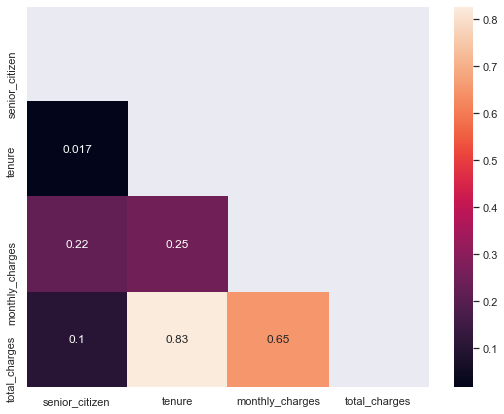

In [30]:
plot_corr(df);

In [ ]:
observed = pd.crosstab(df.churn, df[col])
chi2, p, degf, expected = chi2_contingency(observed)
bonf, alpha = observed.shape[0]*observed.shape[1], .05
alpha = .05 
print('Observed\n')
print(observed)
print('---\nExpected\n')
print(pd.DataFrame(np.round(expected), index=['No', 'Yes']))
print('---\n')
print(f'Bonferroni correction = {bonf}')
print(f'chi^2 = {chi2:.3f}')
print(f'p     = {np.min([bonf*p, .9999]):.4f}\n\n')

In [8]:
insignificant_variables

['gender', 'phone_service']

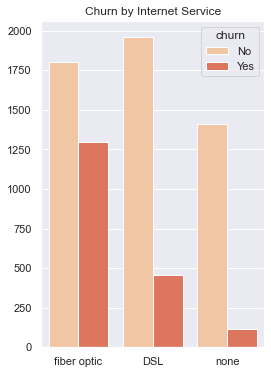

In [20]:
f=plt.subplots(figsize=(4,6))
ax=sns.countplot(data=df, x='internet_service', hue='churn', order=['fiber optic','DSL','none'])
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Churn by Internet Service");

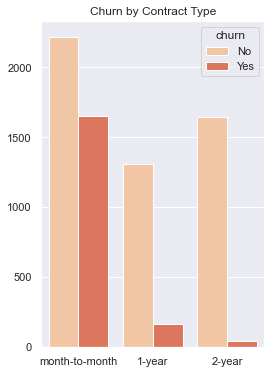

In [21]:
f=plt.subplots(figsize=(4,6))
ax=sns.countplot(data=df, x='contract', hue='churn', order=['month-to-month','1-year','2-year'])
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Churn by Contract Type");

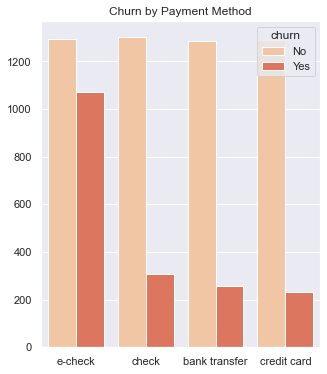

In [22]:
f=plt.subplots(figsize=(5,6))
ax=sns.countplot(data=df, x='payment_method', hue='churn', order=['e-check','check','bank transfer', 'credit card'])
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Churn by Payment Method");